In [1]:
!pip install pycaret==2.3.1

In [2]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from pycaret.classification import setup

clf = setup(data=train_data, target="Survived", session_id=123, numeric_imputation="mean", categorical_imputation="mode")

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
from pycaret.classification import compare_models

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8155,0.0000,0.7420,0.7781,0.7592,0.6097,0.6105,0.1520
gbc,Gradient Boosting Classifier,0.8123,0.8566,0.6842,0.8116,0.7413,0.5954,0.6018,0.4320
lr,Logistic Regression,0.8122,0.8581,0.7498,0.7689,0.7583,0.6047,0.6060,1.5200
ada,Ada Boost Classifier,0.8025,0.8534,0.7092,0.7757,0.7378,0.5801,0.5844,0.1800
dt,Decision Tree Classifier,0.7995,0.7855,0.7213,0.7603,0.7385,0.5762,0.5783,0.0580
rf,Random Forest Classifier,0.7978,0.8603,0.6647,0.7863,0.7182,0.5630,0.5694,0.3330
et,Extra Trees Classifier,0.7914,0.8531,0.6565,0.7768,0.7102,0.5496,0.5553,0.3470
lightgbm,Light Gradient Boosting Machine,0.7849,0.8566,0.7045,0.7422,0.7180,0.5450,0.5496,0.2520
lda,Linear Discriminant Analysis,0.7062,0.6939,0.6238,0.6287,0.6241,0.3835,0.3854,0.3600
knn,K Neighbors Classifier,0.6919,0.7307,0.5865,0.6148,0.5984,0.3492,0.3509,0.1150


In [5]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [6]:
from pycaret.classification import models

models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [7]:
from pycaret.classification import create_model

gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8542,0.7600,0.9048,0.8261,0.7273,0.7341
1,0.7937,0.8721,0.7200,0.7500,0.7347,0.5660,0.5663
2,0.7302,0.8242,0.6400,0.6667,0.6531,0.4324,0.4327
3,0.7903,0.8108,0.6800,0.7727,0.7234,0.5557,0.5586
4,0.7419,0.7725,0.5833,0.7000,0.6364,0.4389,0.4433
5,0.8387,0.8876,0.6667,0.8889,0.7619,0.6437,0.6589
6,0.8065,0.8739,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.9032,0.9364,0.7917,0.9500,0.8636,0.7896,0.7975
8,0.8387,0.8783,0.7083,0.8500,0.7727,0.6493,0.6558
9,0.8065,0.8558,0.6250,0.8333,0.7143,0.5724,0.5860


In [8]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [9]:
from pycaret.classification import tune_model

tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8616,0.7200,0.8571,0.7826,0.6591,0.6653
1,0.7937,0.8332,0.7200,0.7500,0.7347,0.5660,0.5663
2,0.7778,0.7932,0.6800,0.7391,0.7083,0.5293,0.5305
3,0.7581,0.7962,0.7600,0.6786,0.7170,0.5069,0.5094
4,0.7419,0.7763,0.6667,0.6667,0.6667,0.4561,0.4561
5,0.8387,0.8925,0.7917,0.7917,0.7917,0.6601,0.6601
6,0.8065,0.8936,0.7083,0.7727,0.7391,0.5857,0.5871
7,0.8387,0.9134,0.7083,0.8500,0.7727,0.6493,0.6558
8,0.8226,0.8734,0.7083,0.8095,0.7556,0.6173,0.6207
9,0.7903,0.8596,0.6667,0.7619,0.7111,0.5477,0.5507


In [10]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


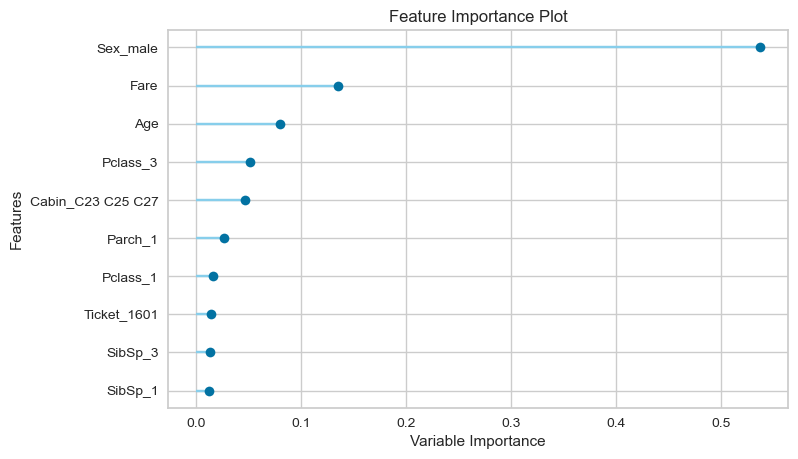

In [11]:
from pycaret.classification import plot_model

plot_model(tuned_gbc, plot="feature")

In [12]:
from pycaret.classification import finalize_model

final_gbc = finalize_model(tuned_gbc)
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [13]:
from pycaret.classification import predict_model

test_pred = predict_model(final_gbc, data=test_data)
test_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.7939
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.6150
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8627
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.9063
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.5116


In [14]:
subm_data = test_pred[["PassengerId", "Label"]]
subm_data = subm_data.rename(columns={"Label" : "Survived"})

subm_data.to_csv("submission_titanic.csv", index=False)

subm_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
